# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [9]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [10]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [11]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [15]:
# Add model training in here!
model = RandomForestClassifier(
    n_estimators = 400

) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier(n_estimators=400)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [16]:
# Generate predictions here!

predictions = model.predict(X_test)


tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [17]:
# Calculate performance metrics here!


print(f"True Positives: {tp}")
print(f"False Positives: {tp}")


print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}\n")


print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")

print(f"Precision: {metrics.precision_score(y_test, predictions)}")


print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True Positives: 19
False Positives: 19
True Negatives: 3283
False Negatives: 347

Accuracy: 0.9041621029572837
Precision: 0.8636363636363636
Recall: 0.05191256830601093


True Positives (19): The model has limited success in correctly identifying churners; it only identified 19 true cases of churn.

False Positives (19): The model incorrectly predicted 19 customers would churn when they did not. This equals the number of true positives, suggesting a need to refine the model's predictive accuracy.

True Negatives (3283): The model is effective in identifying customers who will not churn, with 3283 correct non-churn predictions. This is a strong point of the model.

False Negatives (347): The model missed 347 actual churn cases, predicting they would not churn when they did. This is a significant number and a critical area for improvement.

Accuracy (0.904): The model has an overall accuracy rate of around 90%, which seems high but can be misleading. Given the imbalance in the dataset, where only 10% are churners, this metric may not be the best indicator of performance.

Precision (0.864): The precision score indicates that when the model predicts churn, it is correct around 86% of the time. This is not a perfect score and can be improved.

Recall (0.052): The recall is very low, meaning the model identifies just over 5% of all actual churners. This indicates the model is not effective at detecting the majority of churn cases, which is a serious drawback.

In summary, while the model is good at identifying who will not churn, it struggles significantly with correctly identifying churners, as shown by the low number of true positives and low recall. Precision is moderate, but the balance between precision and recall is not optimal. The high number of false negatives and the low recall rate are the primary concerns that need addressing to improve the model's performance.








###Interpreting the Model

In [18]:
#Creating a dataframe of importances, one column with features and the other importances as frequencies

feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

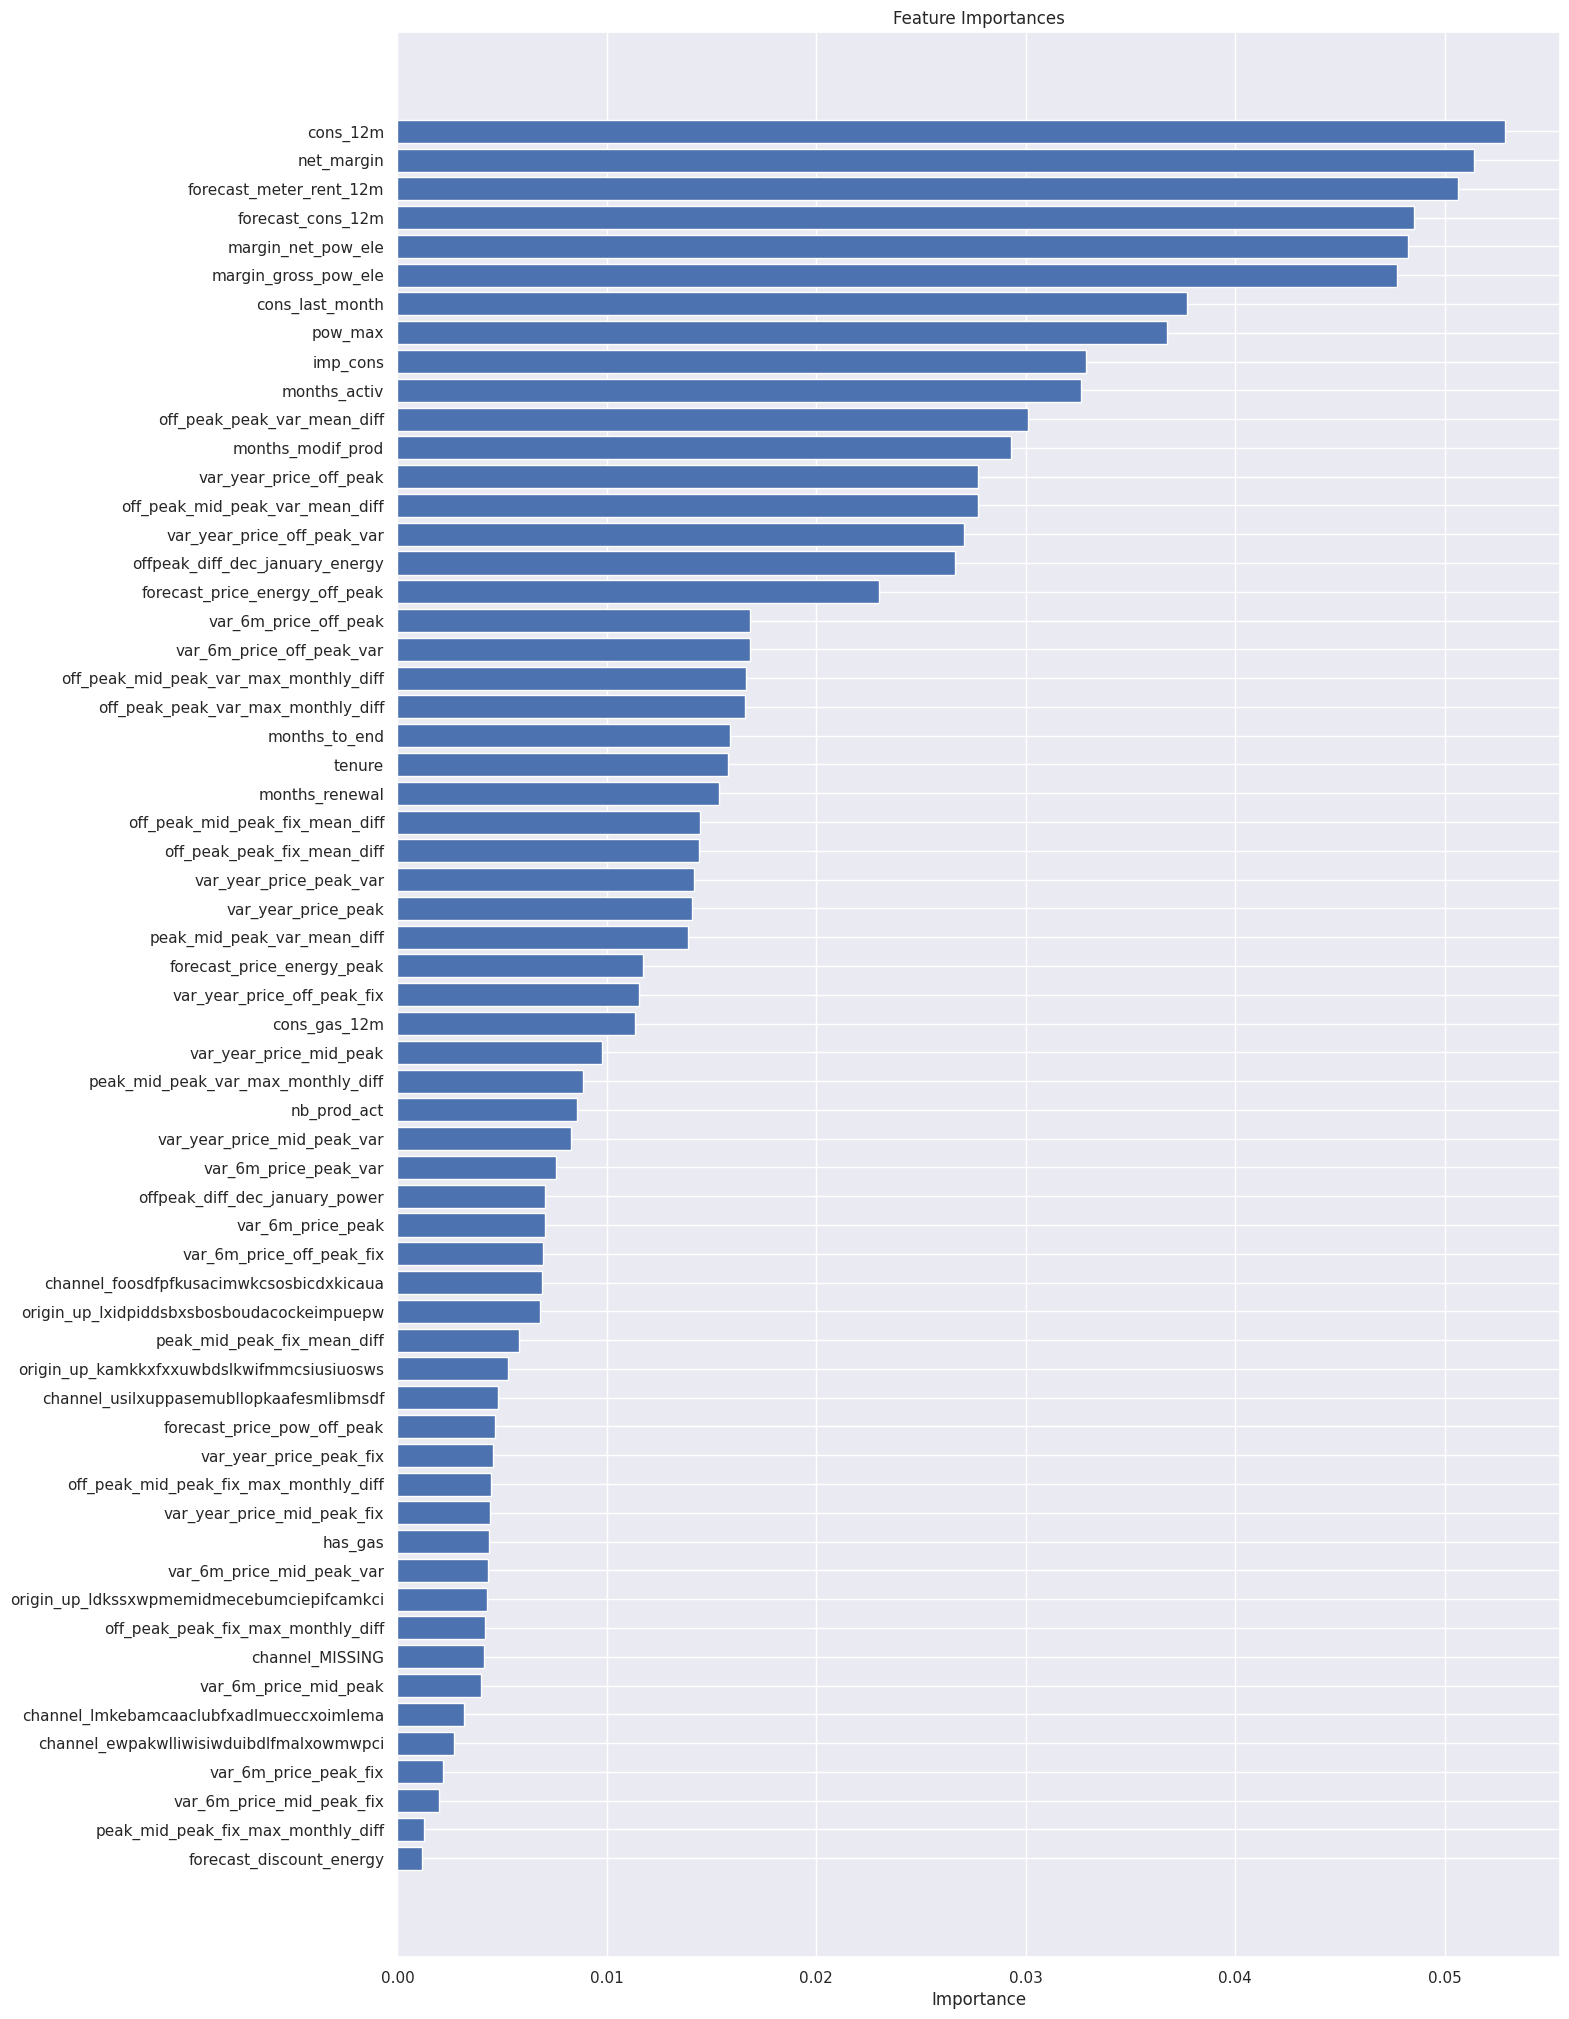

In [19]:
#Plotting the bar graph of feature importances

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')

plt.show()

###Results Discussion

* Net margin and 12-month consumption are key indicators of churn in the model.
* Power subscription margin significantly influences churn predictions.
* Duration metrics like months active, contract tenure, and time since contract modification are important for churn forecasting.
* A feature suggested by a colleague ranks in the upper half for influence, with some derivative features performing even better.
* Price sensitivity factors are present but are not primary indicators of customer churn.


The last bullet point answers our question:  Is churn driven by the customers' price sensitivity?

Given the bar graph of feature importances, it looks like it is a weak contributor. However, we will need additional experimentation to arrive at a more concrete result.

